In [ ]:
!pip install git+https://github.com/NHERI-SimCenter/BrailsPlusPlus
!pip install plotly

In [1]:
# Written: sy Aug 2024
# License: BSD-2

"""
 Purpose: Testing Imputer
"""

import os
import sys
import copy
import json

import numpy as np

sys.path.insert(0, "../../")
from brails.utils.utils import Importer
from brails.types.image_set import ImageSet    
from brails.types.asset_inventory import Asset, AssetInventory


### Loading data table from csv

In [2]:
file_path = "./example_Tiburon.csv"

In [3]:
# create an Import to get the classes

importer = Importer()
knn_imputer_class = importer.get_class("KnnImputer")

In [4]:
inventory = AssetInventory()
inventory.read_from_csv(file_path,keep_existing=True, id_column='index') 

No existing inventory found. Creating a new inventory


True

In [5]:
inventory.get_asset_features(4)[1]  # empty or 'NA' are missing values

{'index': 4,
 'erabuilt': 'NA',
 'numstories': 2,
 'roofshape': 'Hip',
 'fpAreas': 10802,
 'occupancy2': 'Residential',
 'fparea': '',
 'repaircost': '',
 'constype': '',
 'occupancy': '',
 'type': 'building'}

### Importing imputer and run imputation

In [6]:
imputer=knn_imputer_class()
new_inventory = imputer.impute(inventory,n_possible_worlds=10)

missing percentages among 3249 assets
erabuilt: 14.19%
numstories: 13.82%
occupancy2: 3.42%
fparea: 14.19%
repaircost: 14.19%
constype: 14.19%
occupancy: 14.19%
Primative imputation done.
Running the main imputation. This may take some time.
Done imputation. It took 0.13 mins


### Inspecting the results

In [7]:
try:
  import plotly.express as px
except:
  !pip install plotly
  import plotly.express as px

In [8]:
# Table for the original data
inventory_df, geom_df, nbldg = inventory.get_dataframe()
inventory_df.replace('', np.nan, inplace=True) # for visualization
inventory_df.replace('NA', np.nan, inplace=True) # for visualization

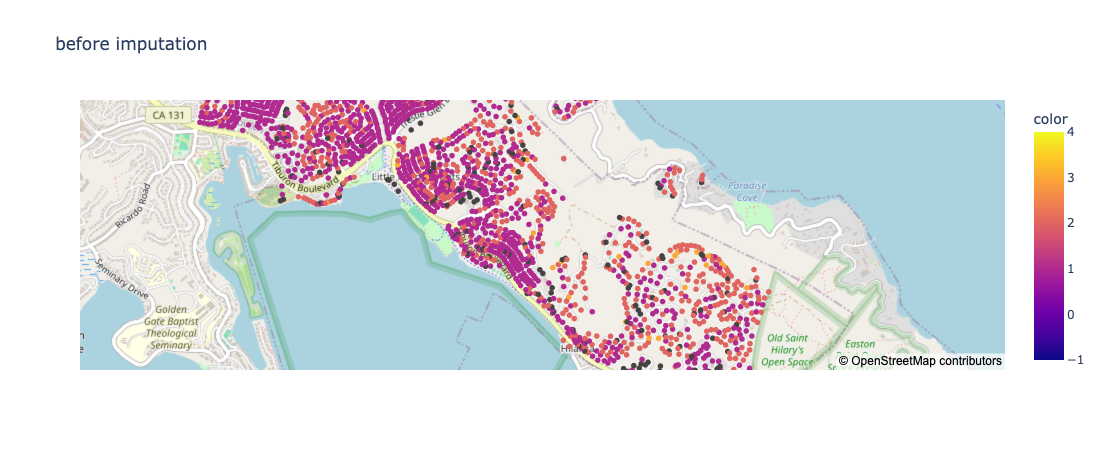

In [9]:

fig = px.scatter_mapbox(geom_df, lat="Lat", lon="Lon", color=(inventory_df["numstories"].astype(float)),range_color=[-1,4],zoom=13, mapbox_style='open-street-map',width=600, height=450,title='before imputation')
fig.show()

In [10]:
# Table the new inventory
inventory_new_df, geom_new_df, nbldg = new_inventory.get_dataframe(n_possible_worlds=10)

In [11]:
fig = px.scatter_mapbox(geom_new_df, lat="Lat", lon="Lon", color=inventory_new_df["numstories_1"].astype(float),range_color=[-1,4], zoom=13, mapbox_style='open-street-map',width=600, height=450,title='After imputation - world 1')
fig.show()

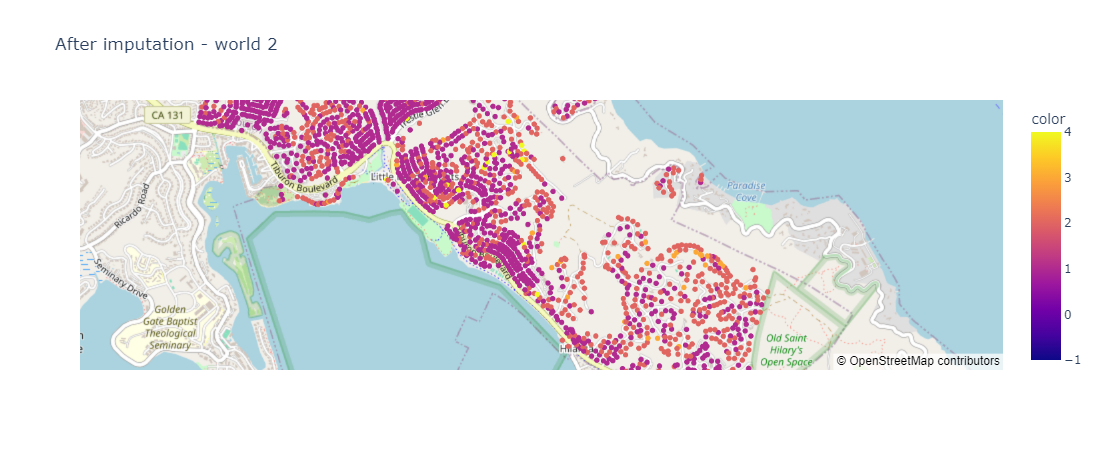

In [12]:
fig = px.scatter_mapbox(geom_new_df, lat="Lat", lon="Lon", color=inventory_new_df["numstories_2"].astype(float),range_color=[-1,4], zoom=13, mapbox_style='open-street-map',width=400*1.5, height=300*1.5,title='After imputation - world 2')
fig.show()